<a href="https://colab.research.google.com/github/Naeem2121870/BIG-DATA/blob/main/WEEK_5_PRACTICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1 IRIS Dataset

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [4]:
#load the dataset
iris = load_iris()

In [5]:
print(f'The type of iris is {type(iris)}')

The type of iris is <class 'sklearn.utils._bunch.Bunch'>


In [6]:
#extract all rows and the last two columns into x
X = iris.data[:,2:]
y = iris.target

In [ ]:
# show iris target variable values
iris.target

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# build a tree
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [10]:
# You m#ay need to install some packages though
'''
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_model,
out_file=('iris.dot'),
feature_names=iris.feature_names[2:],
class_names=iris.target_names,
rounded=True,
filled=True)
!dot -Tpng iris.dot -o iris.pdf
'''

"\nfrom sklearn.tree import export_graphviz\ndot_data = export_graphviz(tree_model,\nout_file=('iris.dot'),\nfeature_names=iris.feature_names[2:],\nclass_names=iris.target_names,\nrounded=True,\nfilled=True)\n!dot -Tpng iris.dot -o iris.pdf\n"

**1.2.1 Load Data**

In [22]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 1.2.2 Add/ Drop Columns

In [23]:
# add a new column to the dataset
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [24]:
# drop the target name
df.drop(['target'],axis=1,inplace=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
# lets change the columns names in the dataset
df.columns = ['sLength','sWidth','pLength','pWidth','Species']
df.head()


,sLength,sWidth,pLength,pWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **1.2.3 Save Data**

In [26]:
# set index to false to prevent pandas from adding extra column to your dataset
df.to_csv('../data/iris.csv',index = False)
# if needed you can always reload the dataset as follows
df = pd.read_csv('../data/iris.csv')
df.head()


,sLength,sWidth,pLength,pWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **1.2.4 Data Exploration**

In [27]:
#class labels distribution
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

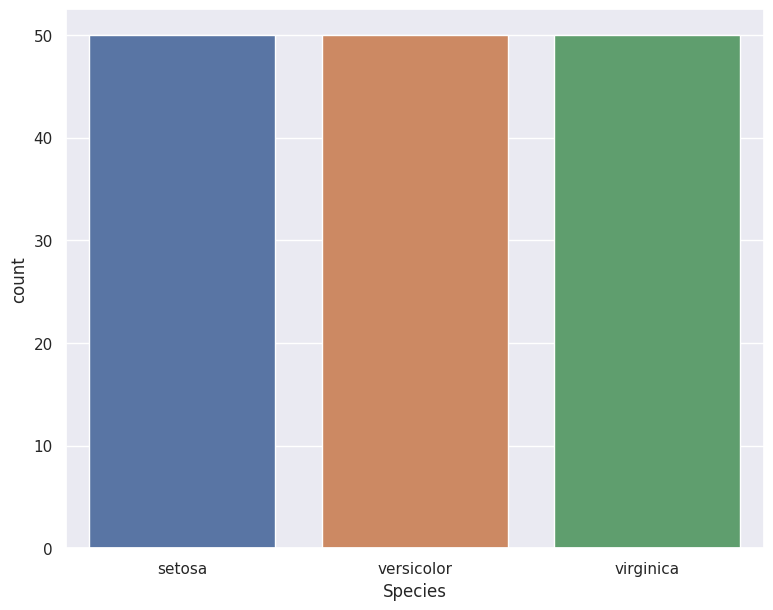

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(9,7)})

sns.countplot (x="Species", data=df)
plt.show()

<Axes: xlabel='Species', ylabel='sLength'>

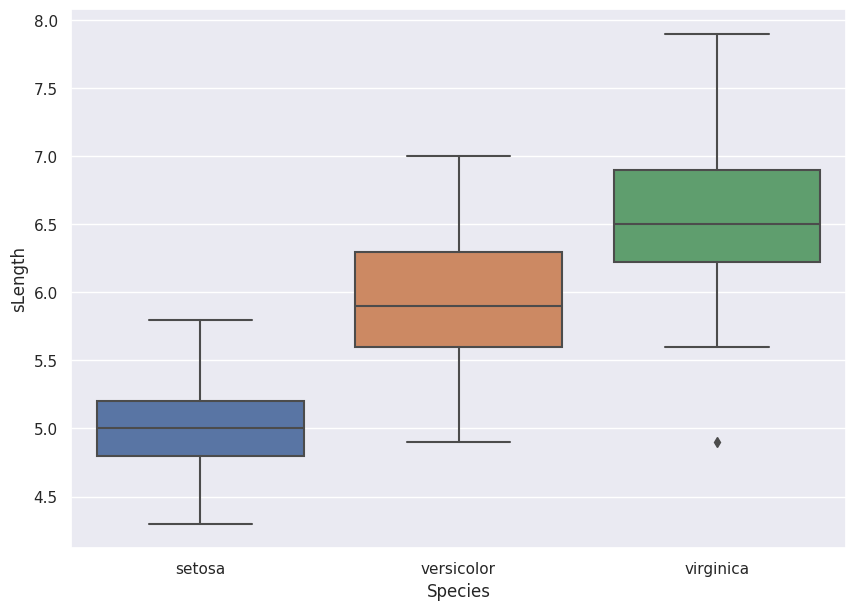

In [31]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='Species',y='sLength')

<Axes: xlabel='Species', ylabel='pWidth'>

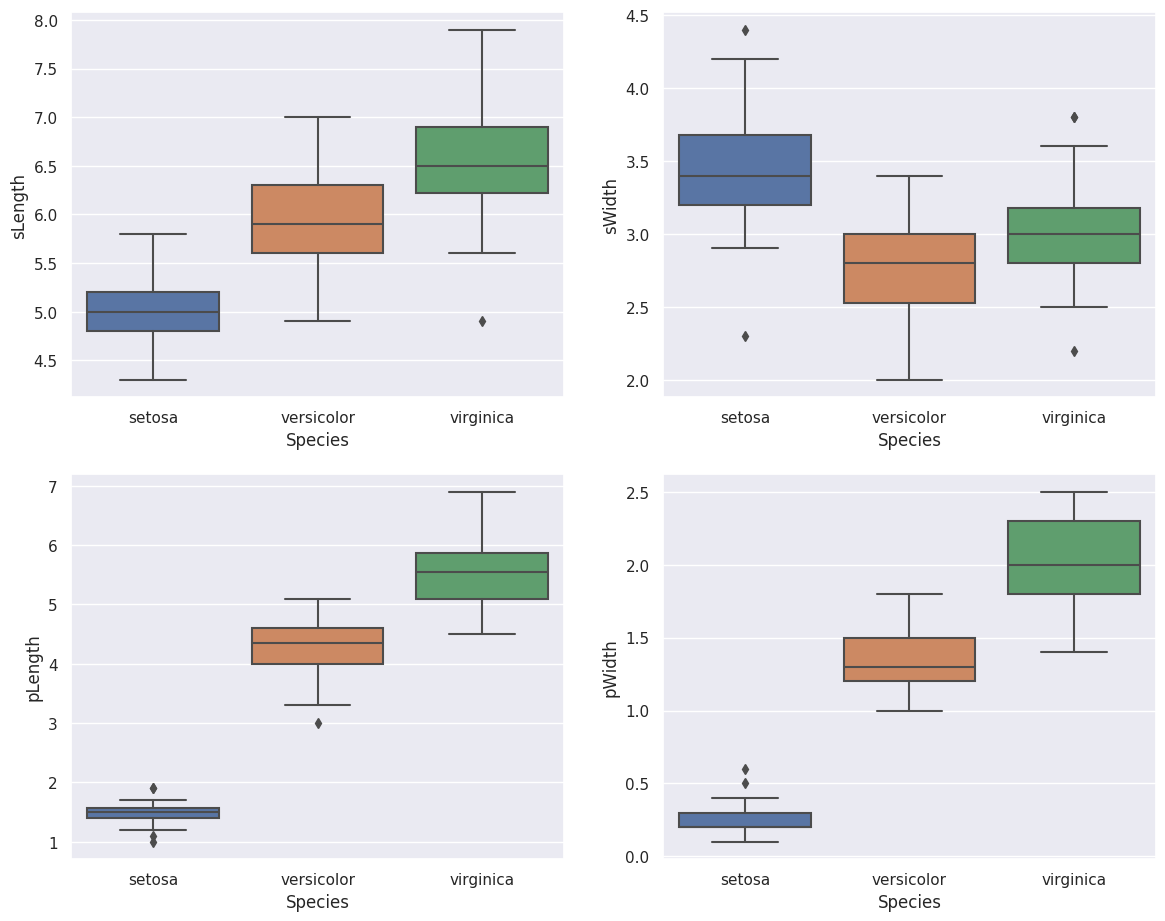

In [32]:
# make four subplots
plt.figure(figsize=(14,11))
# first subplot (nrows, ncols, position)
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='sLength',data=df)
# second
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='sWidth',data=df)
# third
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='pLength',data=df)
# fourth
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='pWidth',data=df)


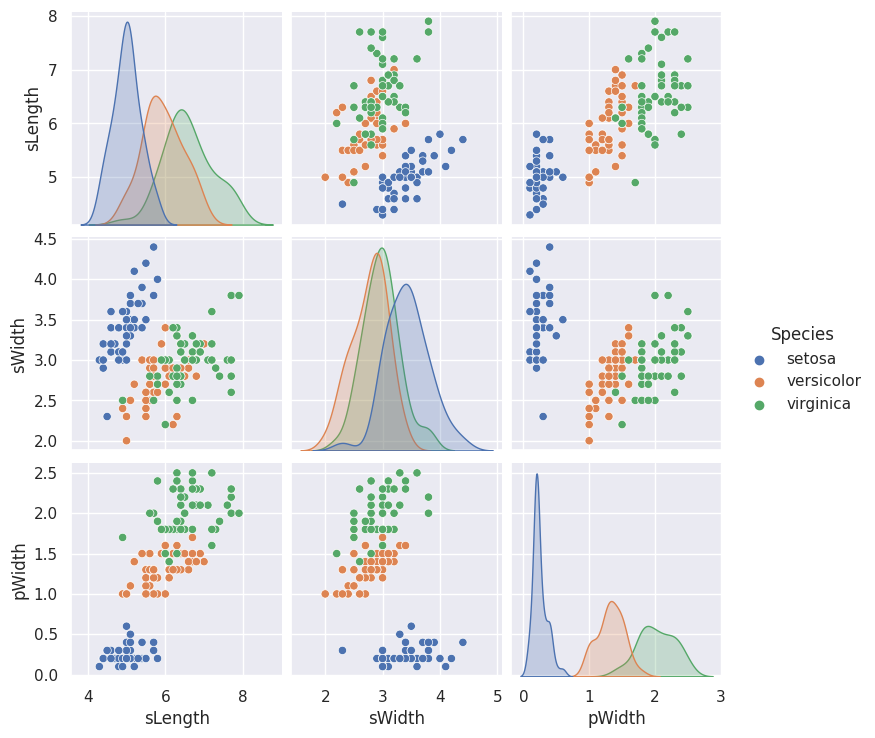

In [35]:
# columns to plot
cols_names =['sLength','sWidth','pWidth','Species']
sns.pairplot(df[cols_names], hue="Species")
plt.show()

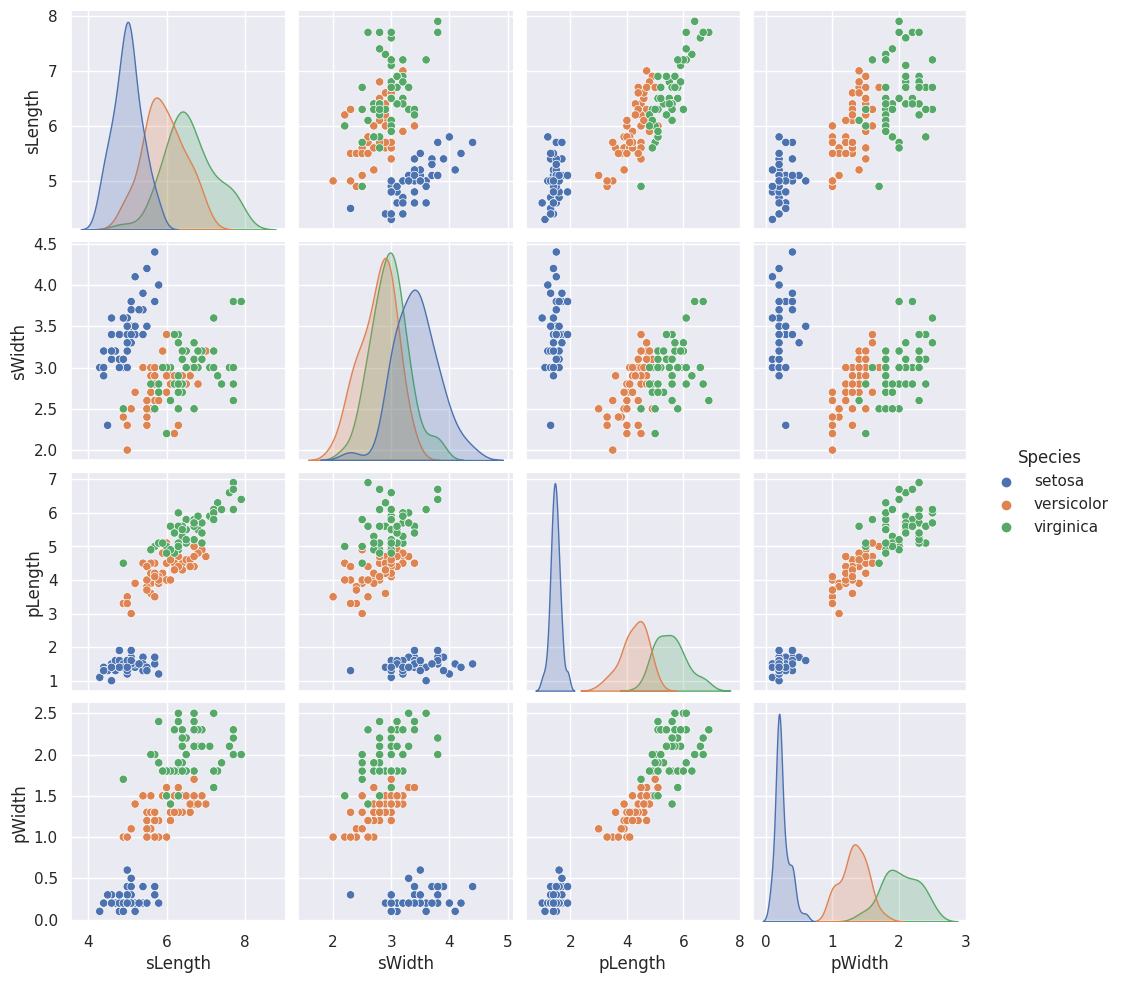

In [36]:
#plot relations between features
sns.pairplot (df, hue="Species")
plt.show()


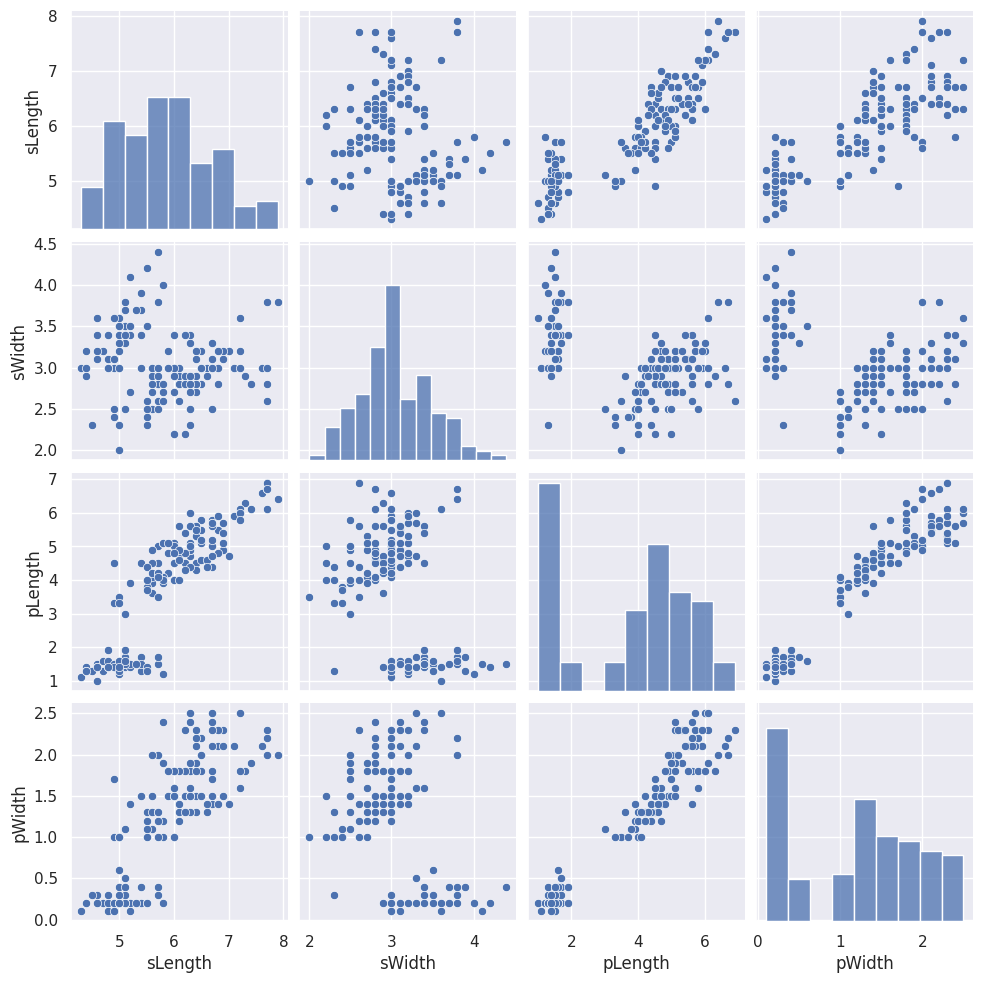

In [39]:
#scatter matrix
sns.pairplot(df)

[Text(0.5, 0, 'Petal Length'), Text(0, 0.5, 'Petal Width')]

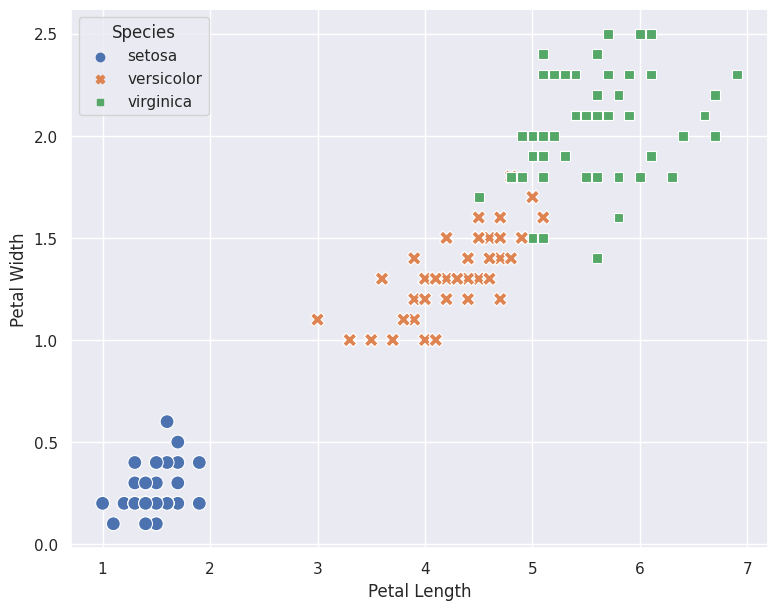

In [41]:
# set variables, size and size of the markers of the plot
ax = sns.scatterplot(x='pLength', y="pWidth", data=df, hue='Species',
style='Species',s=100)
ax.set(xlabel='Petal Length', ylabel='Petal Width')


In [42]:
#compute correlations
cor_matrix = df.corr()
cor_matrix

<ipython-input-42-364e0728ca73>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.corr()


,sLength,sWidth,pLength,pWidth
sLength,1.000000,-0.117570,0.871754,0.817941
sWidth,-0.117570,1.000000,-0.428440,-0.366126
pLength,0.871754,-0.428440,1.000000,0.962865
pWidth,0.817941,-0.366126,0.962865,1.000000


[Text(0.5, 0, 'Sepal Length'), Text(0, 0.5, 'Sepal Width')]

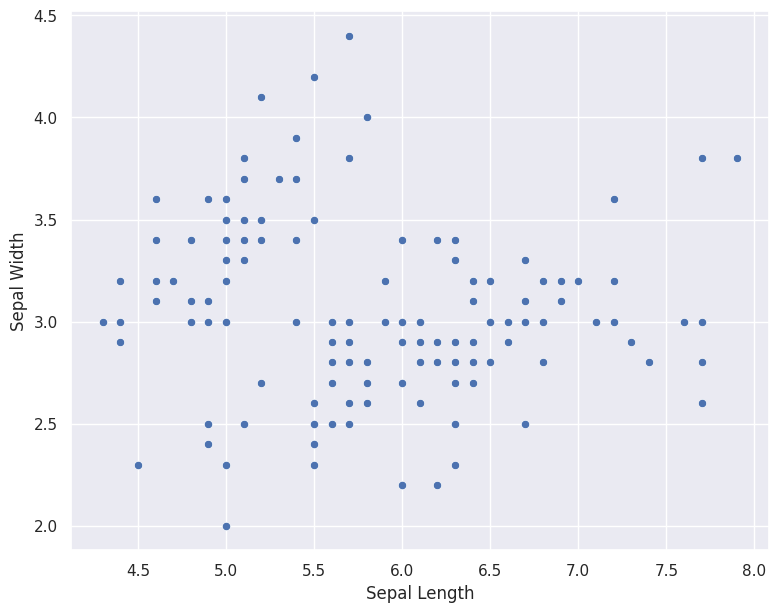

In [43]:
ax = sns.scatterplot (x='sLength', y="sWidth", data=df)
ax.set(xlabel='Sepal Length', ylabel='Sepal Width')

[Text(0.5, 0, 'Petal Length'), Text(0, 0.5, 'Petal Width')]

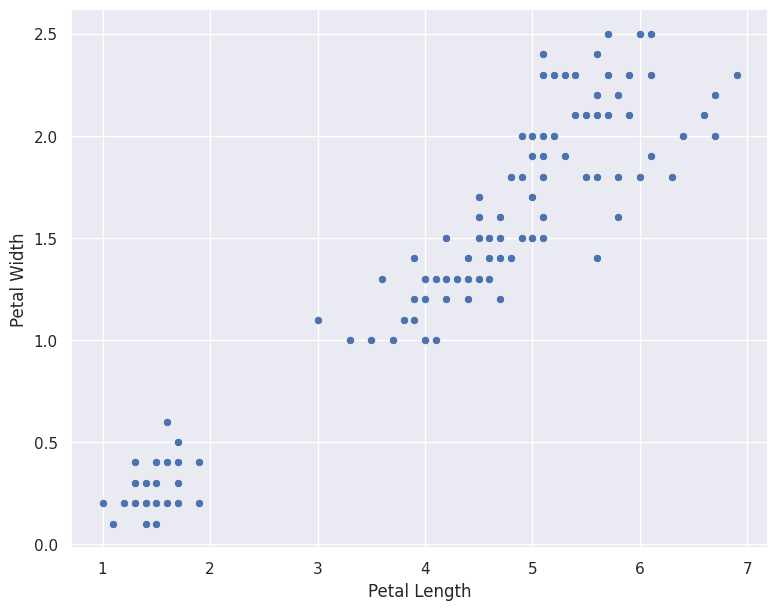

In [44]:
ax = sns.scatterplot(x='pLength', y="pWidth", data=df)
ax.set(xlabel='Petal Length', ylabel= 'Petal Width')

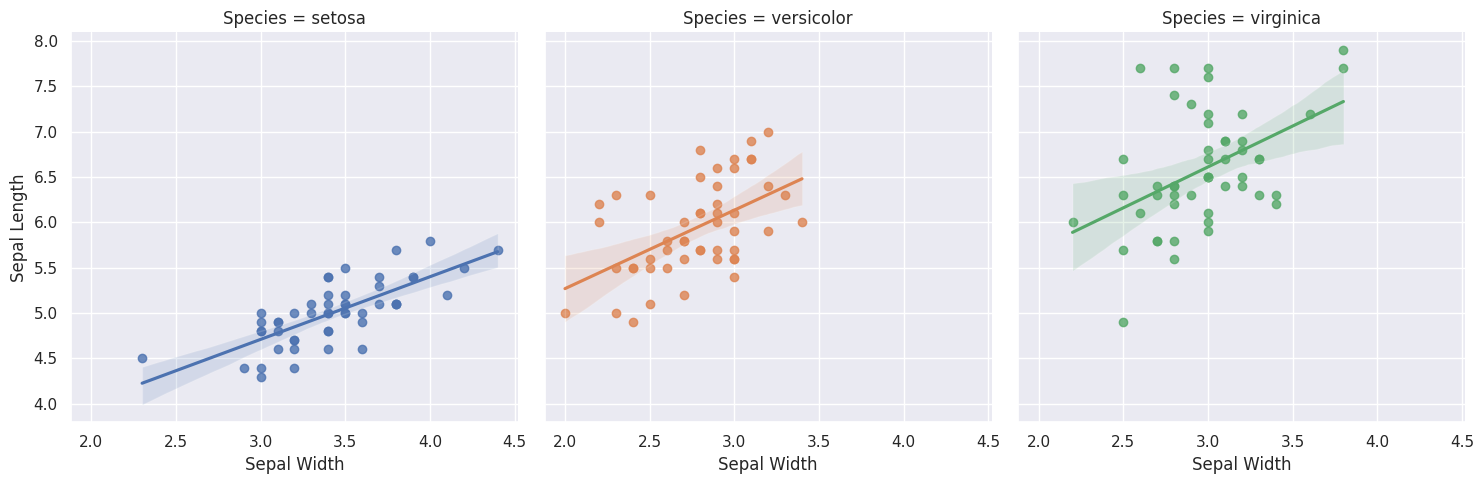

In [45]:
ax = sns.lmplot(x = 'sWidth', y = 'sLength', data = df, col = 'Species', hue = 'Species')
ax.set(xlabel='Sepal Width', ylabel='Sepal Length')

In [46]:
# create correlation matrix (ignore the sign)
corr_matrix = df.corr().abs()
corr_matrix

<ipython-input-46-26268ed74401>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


,sLength,sWidth,pLength,pWidth
sLength,1.000000,0.117570,0.871754,0.817941
sWidth,0.117570,1.000000,0.428440,0.366126
pLength,0.871754,0.428440,1.000000,0.962865
pWidth,0.817941,0.366126,0.962865,1.000000


In [47]:
 # get the upper triangle of the matrix
import numpy as np
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

<ipython-input-47-44a0c8806d26>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,sLength,sWidth,pLength,pWidth
sLength,NaN,0.11757,0.871754,0.817941
sWidth,NaN,NaN,0.428440,0.366126
pLength,NaN,NaN,NaN,0.962865
pWidth,NaN,NaN,NaN,NaN


In [48]:
#Find features with correlation coefficient > 0.95
to_drop = [column for column in upper.columns if any (upper[column]>0.95)]

In [49]:
print(f'The feature that you can drop is {to_drop}')

The feature that you can drop is ['pWidth']


[]

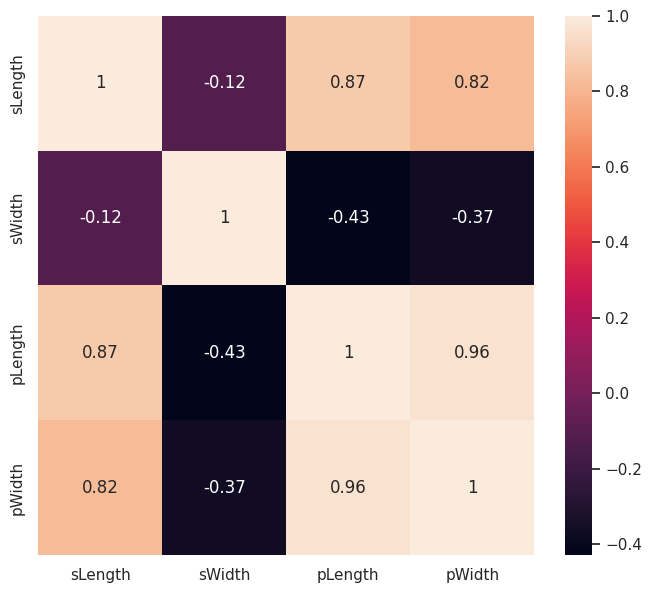

In [50]:
ax = plt.figure(figsize=(8,7))
ax = sns.heatmap(cor_matrix, annot=True)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

plt.plot()

# **1.3 Data Preparation**

In [52]:
# create new data frame with only four columns from the original df
num_df = df[['sLength','sWidth','pLength','pWidth']]
num_df.head()

,sLength,sWidth,pLength,pWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
num_df.loc[(num_df['sLength'] ==5.0), 'sWidth'] = None

In [54]:
# check missing values now
num_df.isnull().sum()

sLength     0
sWidth     10
pLength     0
pWidth      0
dtype: int64

In [57]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(num_df)

SimpleImputer(strategy='median')

In [60]:
imputer.statistics_

array([5.8 , 3.  , 4.35, 1.3 ])

In [61]:
#num_df_imputed is of type Numpy Array
num_df_imputed = imputer.transform(num_df)

In [63]:
num_DF = pd.DataFrame(num_df_imputed, columns=num_df.columns, index =num_df.index)
num_DF.head()


,sLength,sWidth,pLength,pWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.0,1.4,0.2


In [64]:
num_DF.isnull().sum()

sLength    0
sWidth     0
pLength    0
pWidth     0
dtype: int64

# **1.4 Decision Tree Model**

In [65]:
df.head()

,sLength,sWidth,pLength,pWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Import LabelEncoder
from sklearn import preprocessing

In [69]:
# create label ecnoder to encode the labels (setosta, ...) into integers
le = preprocessing.LabelEncoder()


In [91]:
#Converting string labels into numbers
df.Species = le.fit_transform(df.Species)
#check the data now
df.head

<bound method NDFrame.head of      sLength  sWidth  pLength  pWidth  Species
0        5.1     3.5      1.4     0.2        0
1        4.9     3.0      1.4     0.2        0
2        4.7     3.2      1.3     0.2        0
3        4.6     3.1      1.5     0.2        0
4        5.0     3.6      1.4     0.2        0
..       ...     ...      ...     ...      ...
145      6.7     3.0      5.2     2.3        2
146      6.3     2.5      5.0     1.9        2
147      6.5     3.0      5.2     2.0        2
148      6.2     3.4      5.4     2.3        2
149      5.9     3.0      5.1     1.8        2

[150 rows x 5 columns]>

In [72]:
# split the data into Features and Label (X, y)
features = ['sLength','sWidth','pLength','pWidth']
X = df[features]# returns data frame
y = df['Species']


In [75]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.20,random_state=0)

In [76]:
print ('The shape of the trainning set is ', X_train.shape)

The shape of the trainning set is  (120, 4)


In [77]:
# create an instance of the decision tree model
clf = DecisionTreeClassifier(max_depth = 2,
random_state = 0)

In [78]:
#train the model (notice the parameters of the DecisionTreeClassifier)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [79]:
# Prediction for one instance (first one in the testing set)
label0 = clf.predict(X_test.iloc[0].values.reshape(1, -1))
# Predictions for the 10 instances in the testing set
labels_1_to_10= clf.predict(X_test[0:10])
# Predictions for the whole testing set
predictions = clf.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [80]:
#Get the models accuracy
accuracy = clf.score(X_test, y_test)
print (f'The Model Accuracy is {round (accuracy*100,2)}%')

The Model Accuracy is 96.67%


In [87]:
# We can manually try various values:
max_depth_vals = list(range(1, 10))
# We need a list to store the accuracy for each model with different max depth
# List to store the average RMSE for each value of max_depth:
accuracy_list = []
# Try different max depth values above
for max_depth in max_depth_vals:
    # create the model with specific max depth
    clf = DecisionTreeClassifier(max_depth = max_depth,
                            random_state = 0)
  # fit the data
clf.fit(X_train, y_train)
# get accuracy and store it in the list accuracy
accuracy = clf.score(X_test, y_test)
accuracy_list.append(accuracy)


In [88]:
#you can now view the list of accuracies
print(accuracy_list)

[1.0]


In [ ]:
# create list of tuples (pairs of depth and accuracy)
depth_accuracies = list(zip(max_depth_vals,accuracy_list))
# create a data frame
results = pd.DataFrame(data=depth_accuracies, columns=['max_depth','accuracy'])
results

[Text(0.5, 0, 'Tree Depth'), Text(0, 0.5, 'Accuracy')]

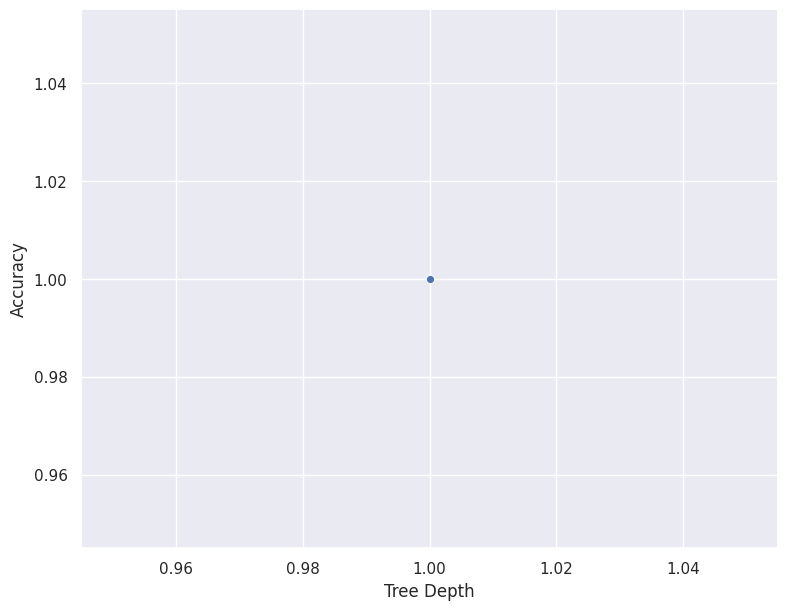

In [89]:
ax = sns.lineplot(x="max_depth", y="accuracy", data=results, marker="o")
ax.set(xlabel='Tree Depth', ylabel='Accuracy')

In [92]:
 # create data frame to store features importances
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
#sort the data frame by importance attribute
importances = importances.sort_values ('importance', ascending=False)
#show results
importances

,feature,importance
3,pWidth,0.923
2,pLength,0.064
1,sWidth,0.013
0,sLength,0.000
